In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All Libraries imported successfully!")

All Libraries imported successfully!


In [2]:
iris = load_iris()

df = pd.DataFrame(
    data = iris.data,
    columns = iris.feature_names
)

df['target'] = iris.target

df['species'] = df['target'].map({
    0: 'setosa',
    1: 'versicolor',  
    2: 'virginica'
 })

print('Dataset loaded successfully!')
print(f'\n Dataset shape: {df.shape}')
print(f'Number of samples: {len(df)}')
print(f'Number of features: {len(iris.feature_names)}')
print(f'\n First 5 rows:')
df.head()

Dataset loaded successfully!

 Dataset shape: (150, 6)
Number of samples: 150
Number of features: 4

 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# What are we trying to predict?
print("PROBLEM STATEMENT:")
print("Predict the species of iris flower based on 4 measurements")
print("Features (Input):")
for i, feature in enumerate(iris.feature_names, 1):
    print(f"  {i}. {feature}")

print("\nTarget (Output):")
print("  Species: setosa, versicolor, or virginica")

print("\n" + "="*50)
print("This is a CLASSIFICATION problem!")
print("="*50)

PROBLEM STATEMENT:
Predict the species of iris flower based on 4 measurements
Features (Input):
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

Target (Output):
  Species: setosa, versicolor, or virginica

This is a CLASSIFICATION problem!


In [4]:
print("Dataset Statistics:\n")
print(df.describe())

print('Data types:\n')
print(df.dtypes)

print('\n any missing values')
print(df.isnull().sum())

print('Class Distribution:')
print(df['species'].value_counts())

Dataset Statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Data types:

sepal length (cm)    float64
sepal wid

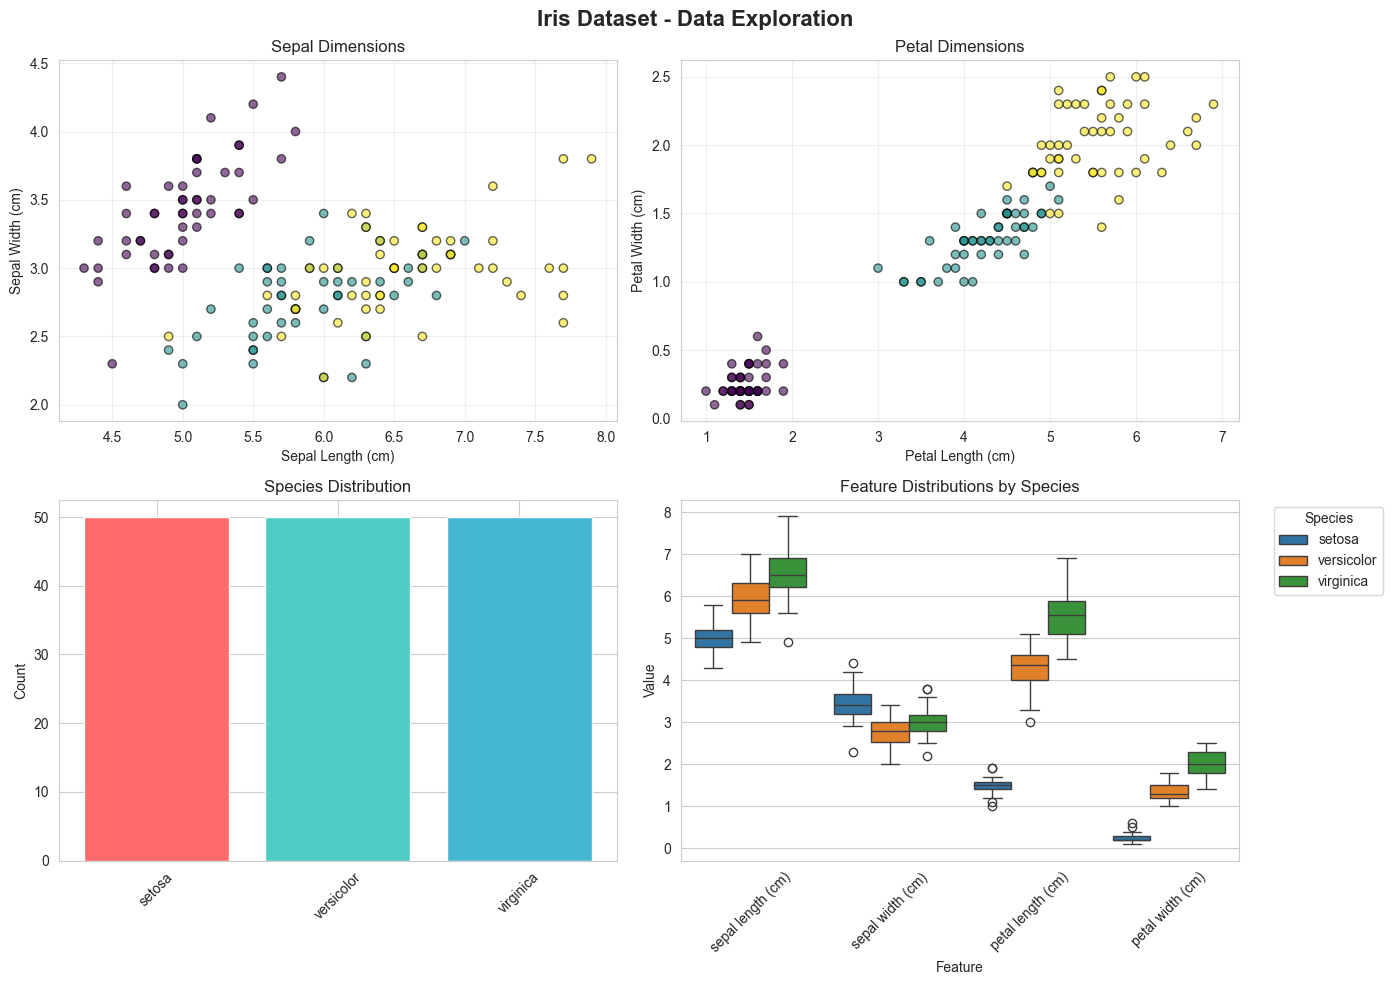

Visualizations complete!


In [5]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Iris Dataset - Data Exploration', fontsize=16, fontweight='bold')

# Plot 1: Sepal Length vs Width
axes[0, 0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], 
                   c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].set_title('Sepal Dimensions')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Petal Length vs Width
axes[0, 1].scatter(df['petal length (cm)'], df['petal width (cm)'], 
                   c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black')
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Dimensions')
axes[0, 1].grid(True, alpha=0.3) 

# Plot 3: Species Distribution
species_counts = df['species'].value_counts()
axes[1, 0].bar(species_counts.index, species_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Species Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Box plot of features
df_melted = df.melt(id_vars=['species'], 
                     value_vars=iris.feature_names,
                     var_name='Feature', 
                     value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='species', ax=axes[1, 1])
axes[1, 1].set_title('Feature Distributions by Species')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("Visualizations complete!")

In [6]:
X = iris.data
Y = iris.target

print(f'\nFeturs (X) shape: {X.shape}')
print(f'\nTarget  (Y) shape: {Y.shape}')
print('Sample Data : ')
print(f'First sample fetures: {X[0]}')
print(f'First sample target: {Y[0]} ({iris.target_names[Y[0]]})')



Feturs (X) shape: (150, 4)

Target  (Y) shape: (150,)
Sample Data : 
First sample fetures: [5.1 3.5 1.4 0.2]
First sample target: 0 (setosa)


In [7]:
# Spliting data for training model

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size = 0.2,
    random_state = 42,
    stratify = Y
)

print("Data Split Complete")
print(f'\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'\nTesting set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f})%')

print("\n Class distribution in training set:")
unique, counts = np.unique(Y_train, return_counts=True)
for species_id, count in zip(unique, counts):
    print(f"  {iris.target_names[species_id]}: {count}")

print("\n Class distribution in testing set:")
unique, counts = np.unique(Y_test, return_counts=True)
for species_id, count in zip(unique, counts):
    print(f"  {iris.target_names[species_id]}: {count}")

Data Split Complete

Training set: 120 samples (80.0%)

Testing set:  30 samples (20.0)%

 Class distribution in training set:
  setosa: 40
  versicolor: 40
  virginica: 40

 Class distribution in testing set:
  setosa: 10
  versicolor: 10
  virginica: 10


In [8]:
# main model
#Decision tree classifier

model = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

print("Model created")
print(f'\nModel type: {type(model).__name__}')
print(f'Parameters: {model.get_params()}')

Model created

Model type: DecisionTreeClassifier
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [9]:
model.fit(X_train, Y_train)

print("Treaning Complete")


Treaning Complete


In [10]:
Y_pred = model.predict(X_test)

print(f'Total predictions: {len(Y_pred)}')

print("\n First 10 Prediction vs actual:")
comparison_df = pd.DataFrame({
    'Predicted': [iris.target_names[p] for p in Y_pred[:10]],
    'Actual': [iris.target_names[a] for a in Y_test[:10]],
    'Match': ["yes" if p == a else "no" for p, a in zip(Y_pred[:10], Y_test[:10])]

})

print(comparison_df.to_string(index=False))


Total predictions: 30

 First 10 Prediction vs actual:
 Predicted     Actual Match
    setosa     setosa   yes
 virginica  virginica   yes
versicolor versicolor   yes
versicolor versicolor   yes
    setosa     setosa   yes
versicolor versicolor   yes
    setosa     setosa   yes
    setosa     setosa   yes
 virginica  virginica   yes
versicolor versicolor   yes


In [11]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("MODEL PERFORMANCE")
print("="*50)
print(f"\n Accuracy: {accuracy * 100:.2f}%")
print(f"   Correct predictions: {int(accuracy * len(Y_test))} out of {len(Y_test)}")
print(f"   Wrong predictions: {len(Y_test) - int(accuracy * len(Y_test))}")

print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_pred, target_names=iris.target_names))

MODEL PERFORMANCE

 Accuracy: 96.67%
   Correct predictions: 29 out of 30
   Wrong predictions: 1

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



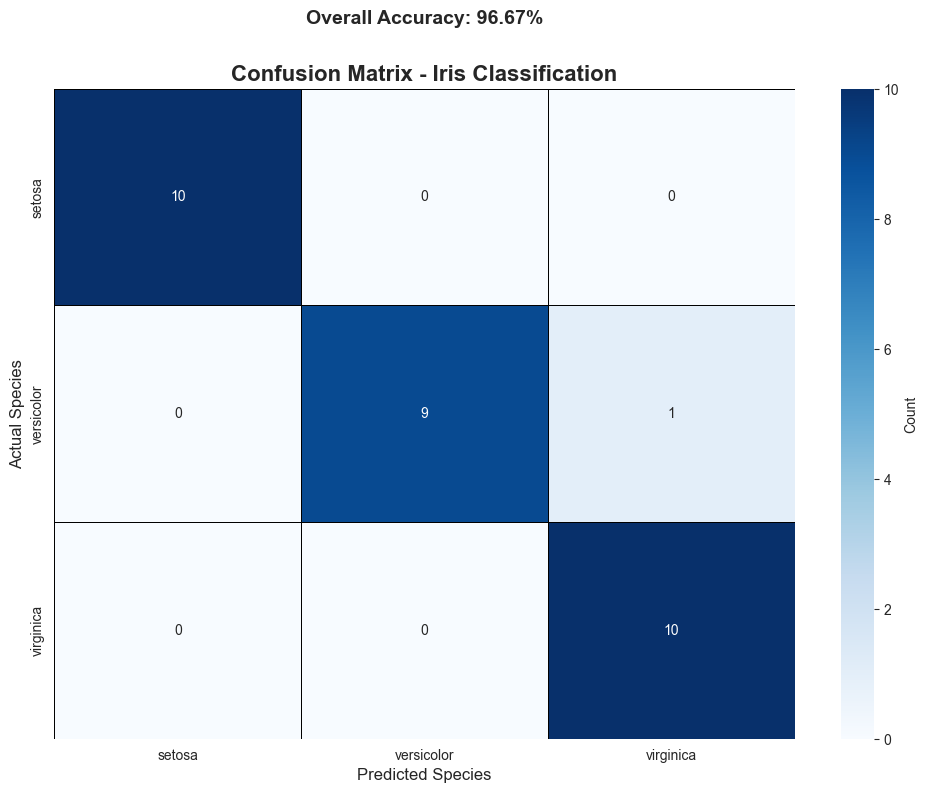

Confusion Matrix visualized!

How to read:
  - Diagonal values = Correct predictions
  - Off-diagonal values = Wrong predictions


In [12]:
# Confusion matrix shows where model makes mistakes
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='black')

plt.title('Confusion Matrix - Iris Classification', fontsize=16, fontweight='bold')
plt.ylabel('Actual Species', fontsize=12)
plt.xlabel('Predicted Species', fontsize=12)

# Add accuracy text
plt.text(1.5, -0.3, f'Overall Accuracy: {accuracy*100:.2f}%', 
         ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Confusion Matrix visualized!")
print("\nHow to read:")
print("  - Diagonal values = Correct predictions")
print("  - Off-diagonal values = Wrong predictions")

In [13]:
# Let's predict on a completely new flower!
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Sample measurements

prediction = model.predict(new_flower)
predicted_species = iris.target_names[prediction[0]]

print("PREDICTION ON NEW FLOWER")
print("="*50)
print(f"\nFlower measurements:")
print(f"  Sepal length: {new_flower[0][0]} cm")
print(f"  Sepal width: {new_flower[0][1]} cm")
print(f"  Petal length: {new_flower[0][2]} cm")
print(f"  Petal width: {new_flower[0][3]} cm")

print(f"\nPredicted species: {predicted_species.upper()}")

# Get prediction probability
proba = model.predict_proba(new_flower)
print(f"\nConfidence levels:")
for i, species in enumerate(iris.target_names):
    print(f"  {species}: {proba[0][i]*100:.2f}%")

PREDICTION ON NEW FLOWER

Flower measurements:
  Sepal length: 5.1 cm
  Sepal width: 3.5 cm
  Petal length: 1.4 cm
  Petal width: 0.2 cm

Predicted species: SETOSA

Confidence levels:
  setosa: 100.00%
  versicolor: 0.00%
  virginica: 0.00%


In [14]:
print("KEY LEARNINGS - SUMMARY")
print("="*60)

learnings = {
    "1. Problem Type": "Classification (predicting categories)",
    "2. Dataset": "Iris - 150 samples, 4 features, 3 classes",
    "3. Train-Test Split": "80-20 split for honest evaluation",
    "4. Algorithm": "Decision Tree Classifier",
    "5. Accuracy Achieved": f"{accuracy*100:.2f}%",
    "6. Key Metrics": "Accuracy, Precision, Recall, F1-Score",
    "7. Visualization": "Confusion Matrix helps spot mistakes",
    "8. Model Use": "Can predict species of new flowers"
}

for key, value in learnings.items():
    print(f"\n{key}: {value}")

print("\n" + "="*60)
print("FIRST ML MODEL COMPLETE!")
print("="*60)

KEY LEARNINGS - SUMMARY

1. Problem Type: Classification (predicting categories)

2. Dataset: Iris - 150 samples, 4 features, 3 classes

3. Train-Test Split: 80-20 split for honest evaluation

4. Algorithm: Decision Tree Classifier

5. Accuracy Achieved: 96.67%

6. Key Metrics: Accuracy, Precision, Recall, F1-Score

7. Visualization: Confusion Matrix helps spot mistakes

8. Model Use: Can predict species of new flowers

FIRST ML MODEL COMPLETE!
